# Importing Required Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split



In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Importing Required Files

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
df = drive.CreateFile({'id':'1JjFjg76_mf8TvwTVyPZUx3OKSHhx8BnW'})
df.GetContentFile('d2c.xlsx')

In [0]:
import io

In [0]:
df = pd.read_excel('d2c.xlsx')

In [7]:
df.head(20)

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,101,No,988.0,15.0,796.0,Female,Single,Yes,No,No,No,employed,1536.0,3455,12.0,38.0,1.0
1,102,No,458.0,15.0,813.0,Female,Single,Yes,No,No,No,employed,947.0,3600,25.0,36.0,1.0
2,103,No,158.0,14.0,756.0,Female,Single,No,Yes,No,No,employed,1678.0,3093,43.0,34.0,1.0
3,104,Yes,300.0,25.0,737.0,Female,Single,No,No,No,Yes,employed,1804.0,2449,0.0,29.0,1.0
4,105,Yes,63.0,24.0,662.0,Female,Single,No,No,No,Yes,unemployed,1184.0,2867,4.0,30.0,1.0
5,106,No,1071.0,20.0,828.0,Male,Married,Yes,No,No,No,employed,475.0,3282,12.0,32.0,2.0
6,107,No,-192.0,13.0,856.0,Male,Single,Yes,No,No,No,employed,626.0,3398,11.0,38.0,1.0
7,108,No,172.0,16.0,763.0,Female,Single,Yes,No,No,No,employed,1224.0,3022,12.0,36.0,1.0
8,109,No,585.0,20.0,778.0,Female,Single,Yes,No,No,No,unemployed,1162.0,3475,12.0,36.0,1.0
9,110,Yes,189.0,19.0,649.0,Male,Married,Yes,No,No,No,employed,786.0,2711,0.0,29.0,1.0


# Data Pre-Processing

In [0]:
from sklearn.feature_selection import SelectPercentile

### Converting lable values to 1,0

In [0]:
df['Default']=pd.Series(np.where(df.Default.values == 'Yes', 1, 0),
          df.index)

In [10]:
df['Gender']=pd.Series(np.where(df.Default.values == 'Male', 1, 0),
          df.index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [0]:
df['Marital_status']=pd.Series(np.where(df.Marital_status.values == 'Married', 1, 0),
                               df.index)


In [0]:
df['Car_loan']=pd.Series(np.where(df.Car_loan.values == 'Yes', 1, 0),
                               df.index)


In [0]:
df['Personal_loan']=pd.Series(np.where(df.Personal_loan.values == 'Yes', 1, 0),
                               df.index)

In [0]:
df['Education_loan']=pd.Series(np.where(df.Education_loan.values == 'Yes', 1, 0),
                               df.index)

In [0]:
df['Emp_status']=pd.Series(np.where(df.Emp_status.values == 'employed', 1, 0),
                               df.index)

In [0]:
df['Home_loan']=pd.Series(np.where(df.Home_loan.values == 'Yes', 1, 0),
                               df.index)

In [17]:
df.head()

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,101,0,988.0,15.0,796.0,0,0,1,0,0,0,1,1536.0,3455,12.0,38.0,1.0
1,102,0,458.0,15.0,813.0,0,0,1,0,0,0,1,947.0,3600,25.0,36.0,1.0
2,103,0,158.0,14.0,756.0,0,0,0,1,0,0,1,1678.0,3093,43.0,34.0,1.0
3,104,1,300.0,25.0,737.0,0,0,0,0,0,1,1,1804.0,2449,0.0,29.0,1.0
4,105,1,63.0,24.0,662.0,0,0,0,0,0,1,0,1184.0,2867,4.0,30.0,1.0


In [0]:
#Removing Null values
df=df.dropna()

In [0]:
is_true =  df['Default']==1

In [0]:
Defaulter_list = df[is_true]

In [21]:
Defaulter_list

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
3,104,1,300.0,25.0,737.0,0,0,0,0,0,1,1,1804.0,2449,0.0,29.0,1.0
4,105,1,63.0,24.0,662.0,0,0,0,0,0,1,0,1184.0,2867,4.0,30.0,1.0
9,110,1,189.0,19.0,649.0,0,1,1,0,0,0,1,786.0,2711,0.0,29.0,1.0
10,111,1,214.0,19.0,742.0,0,1,0,0,0,1,1,1270.0,2925,0.0,25.0,1.0
13,114,1,262.0,21.0,726.0,0,0,1,0,0,0,0,977.0,2191,10.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,891,1,-7.0,20.0,665.0,0,0,1,0,0,0,0,1703.0,2360,110.0,30.0,2.0
793,894,1,116.0,22.0,716.0,0,1,1,0,0,0,0,1083.0,3018,7.0,29.0,2.0
797,898,1,85.0,20.0,843.0,0,1,1,0,0,0,0,1078.0,3212,109.0,30.0,2.0
798,899,1,-293.0,21.0,818.0,0,0,1,0,0,0,0,1002.0,2983,0.0,29.0,2.0


## Feature Selection

In [0]:
from sklearn.feature_selection import SelectPercentile

In [0]:
X = df.drop(['Default'],1)

In [0]:
y=df['Default']

In [25]:
select = SelectPercentile(percentile=25)
select.fit(X, y)
X_selected = pd.DataFrame(select.transform(X))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [26]:
print('X_.shape is: {}'.format(X.shape))
print('X_selected.shape is: {}'.format(X_selected.shape))

X_.shape is: (800, 16)
X_selected.shape is: (800, 4)


In [0]:
cols = select.get_support(indices=True)
features_df_new = X.iloc[:,cols]


In [28]:

features_df_new

,Checking_amount,Credit_score,Saving_amount,Age
0,988.0,796.0,3455,38.0
1,458.0,813.0,3600,36.0
2,158.0,756.0,3093,34.0
3,300.0,737.0,2449,29.0
4,63.0,662.0,2867,30.0
...,...,...,...,...
799,393.0,846.0,3282,31.0
800,462.0,810.0,3873,32.0
801,717.0,739.0,3453,31.0
802,822.0,783.0,3312,34.0


## Train,test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features_df_new, y, random_state=0, test_size=.1)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = pd.DataFrame(data=scaler.transform(X_train),
                       columns=X_train.columns,
                       index=X_train.index)

In [0]:
X_test = pd.DataFrame(data=scaler.transform(X_test),
                       columns=X_test.columns,
                       index=X_test.index)

# Creating Model

In [35]:
import numpy as np
from keras import models
from keras import layers
import pandas as pd

Using TensorFlow backend.


In [36]:
network = models.Sequential()

In [0]:
network.add(layers.Dense(units=16, activation='relu', input_shape=(4,)))

In [0]:
network.add(layers.Dense(units=16, activation='relu'))

In [0]:
network.add(layers.Dense(units=8, activation='relu'))

In [0]:
network.add(layers.Dense(units=8, activation='relu'))

In [0]:
network.add(layers.Dense(units=1, activation='sigmoid'))

In [42]:
network.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Training Model

In [43]:
history = network.fit(X_train,
                      y_train, 
                      epochs=100,
                      verbose=0, 
                      batch_size=48,
                      validation_data=(X_test, y_test))

# Performance Analysis

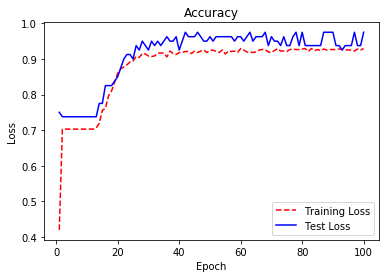

In [44]:
#Accuracy Graph
training_loss = history.history['acc']
test_loss = history.history['val_acc']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.show();

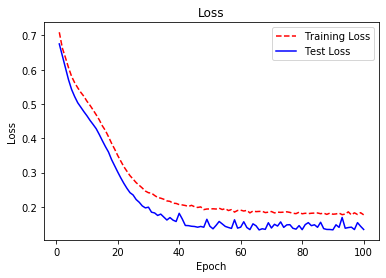

In [45]:
#Loss Graph
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.show();

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [47]:
# predict probabilities for test set
yhat_probs = network.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = network.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.975000
Precision: 1.000000
Recall: 0.904762
F1 score: 0.950000


# Saving the Model

In [0]:
network.save_weights('my_model_weights.h5')
network.save('my_model.h5')

In [0]:
model_file = drive.CreateFile({'title' : 'model.h5'}) 
model_file.SetContentFile('my_model.h5')
model_file.Upload()

In [0]:
weights_file = drive.CreateFile({'title' : 'weights.h5'}) 
weights_file.SetContentFile('my_model_weights.h5')
weights_file.Upload()